# 扩散模型（Diffusion Model）学习笔记

## 一、条件概率公式与高斯分布的KL散度

1、条件概率的一般形式

<font color=Blue>

$P(A,B,C) = P(C|B,A)P(B,A) = P(C|B,A)P(B|A)P(A)$

$P(B,C|A)=P(B|A)P(C|A,B)$

</font>

证明：
左边：P(B,C|A) = P(A,B,C) / P(A)
右边：P(B|A) = P(A,B) / P(A); 而 P(C|A,B) = P(A,B,C) / P(A,B); 两项相乘得：P(A,B,C) / P(A)

2、基于马尔可夫假设的条件概率

如果满足马尔可夫链关系A->B->C， 那么有

<font color=Blue>

$P(A,B,C) = P(C|B,A)P(B,A) = P(C|B)P(B|A)P(A)$

$P(B,C|A)=P(B|A)P(C|B)$
</font>

因为马尔可夫的性质就是当前时刻的状态只与**前一时刻**有关，即C只与B相关，B只与A相关

3、高斯分布的KL散度公式

对于两个单一变量的高斯分布p和q而言，它们的KL散度为

<font color=Blue>

$KL(p,q) = log \frac{\sigma _{2}}{\sigma _{1}} + \frac{\sigma ^{2}_{1} + (\mu _{1} - \mu _{2})^{2}}{2 \sigma ^{2}_{2}} - \frac{1}{2}$

</font>

4、重参数技巧

若希望从高斯分布<font color=Blue> $N(\mu , \sigma ^{2})$</font>中采样， 可以先从标准正态分布<font color=Blue> $N(0 , 1 )$</font>采样出<font color=Blue> $z$</font>，再通过<font color=Blue> $\sigma \ast z + \mu $</font>得到采样结果。这样做的好处的将随机性转移到了<font color=Blue> $z$</font>这个常量上，而<font color=Blue> $\sigma $</font>和<font color=Blue> $\mu $</font>则当作仿射变换网络的一部分。

## 二、Diffusion Model

如下图所示，扩散模型定义了一个马尔可夫链，在扩散过程中慢慢地给原始数据分布添加高斯噪声，随着噪声的不断添加，最终数据分布就变成了一个各项独立的高斯分布；然后我们再学习反向扩散过程，从噪声中构建所需的数据样本。

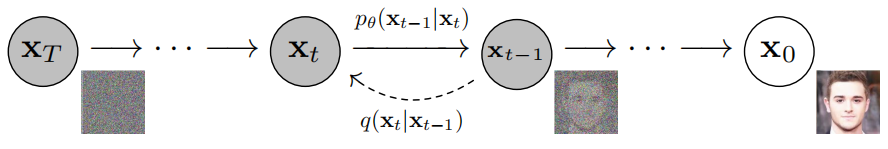

### 1、扩散过程

给定初始数据分布<font color=Blue>$X_{0} \sim q(X)$</font>， 我们定义一个马尔科夫链的前向扩散过程，该过程中的每个时间<font color=Blue>$t$</font>我们慢慢地向分布中添加高斯噪声，该噪声的标准差是由固定值<font color=Blue>$\beta_{t}$</font>确定，均值则是由<font color=Blue>$\beta_{t}$</font>和当前时刻的数据<font color=Blue>$X_{t}$</font>决定。<font color=Blue>$\beta_{t}$</font>定义为<font color=Blue>$(0,1)$</font>的小数，即<font color=Blue>$\{ \beta_{t} \in (0,1)\}_{t=1}^{t}$</font>，那么这个扩散过程可以记为

<font color=Blue>

$q(X_{t}|X_{t-1})= \mathcal{N}(X_{t};\sqrt{1-\beta_{t}}X_{t-1},\beta_{t}\textbf{I})$

</font>

根据基于马尔可夫假设的条件概率公式，有

<font color=Blue>

$q(X_{1:T}|X_{0}) = \prod_{t=1}^{T} q(X_{t}|X_{t-1})$

</font>

随着时间<font color=Blue>$t$</font>逐渐增大，初始数据分布逐渐失去其具有判别性的特征；当<font color=Blue>$T \to \infty$</font>，最终数据分布<font color=Blue>$X_{T}$</font>就等价于一个各向独立的高斯分布。

在扩散过程中，一般而言是一步一步迭代来算出每一步的噪声样本，即根据<font color=Blue>$X_{0}$</font>计算<font color=Blue>$X_{1}$</font>，根据<font color=Blue>$X_{1}$</font>计算<font color=Blue>$X_{2}$</font>，……，一直迭代直到<font color=Blue>$X_{T}$</font>。但是，实际上利用重参数技巧，我们完全可以基于<font color=Blue>$X_{0}$</font>和<font color=Blue>$\beta_{t}$</font>计算出任意时刻的<font color=Blue>$X_{t}$</font>，而不需要做迭代。

求噪声样本<font color=Blue>$X_{t}$</font>，利用从分布<font color=Blue>$\mathcal{N}(\sqrt{1-\beta_{t}} X_{t-1},\beta_{t}\textbf{I})$</font>中抽样，根据重参数技巧，我们可以先从标准正态分布<font color=Blue>$\mathcal{N}(\textbf{0},\textbf{I})$</font>中采样出<font color=Blue>$z_{t-1}$</font>，然后根据重参数技巧得<font color=Blue>$X_{t}=\sqrt{1-\beta_{t}}X_{t-1}+\beta_{t} z_{t-1}$</font>，为简化公式，记